In [25]:
import mysql.connector
import pandas as pd
import numpy as np 

In [26]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "1377215Amir",
    "database": "laptop_analysis",
}

conn = mysql.connector.connect(**db_config)
mycursor = conn.cursor()

In [27]:
query = """ 
SELECT
    Order_Date As Date,
    SUM(Profit) AS Sales
FROM `order`
GROUP BY Order_Date
order by Order_Date
"""
df = pd.read_sql(query,conn)

C:\Users\amirs\AppData\Local\Temp\ipykernel_7508\3239875278.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [28]:
df

,Date,Sales
0,1390-09-06,3.416000e+07
1,1390-09-07,3.060000e+07
2,1390-09-08,3.432000e+07
3,1390-09-09,3.080000e+07
4,1390-09-10,3.450000e+07
...,...,...
4332,1402-07-15,1.350480e+09
4333,1402-07-16,1.324660e+09
4334,1402-07-17,1.451830e+09
4335,1402-07-18,1.522700e+09


In [29]:
from persiantools.jdatetime import JalaliDate
import pandas as pd
df['Date'] = [JalaliDate(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])).to_gregorian() for date in df['Date']]


In [30]:
df.to_csv('df.CSV')
df

,Date,Sales
0,2011-11-27,3.416000e+07
1,2011-11-28,3.060000e+07
2,2011-11-29,3.432000e+07
3,2011-11-30,3.080000e+07
4,2011-12-01,3.450000e+07
...,...,...
4332,2023-10-07,1.350480e+09
4333,2023-10-08,1.324660e+09
4334,2023-10-09,1.451830e+09
4335,2023-10-10,1.522700e+09


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense


data = df['Sales']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

train_size = int(len(data) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

look_back = 10  

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

train_X, train_y = create_dataset(train_data, look_back)
test_X, test_y = create_dataset(test_data, look_back)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(train_X, train_y, epochs=60, batch_size=64, verbose=2)

test_predict = model.predict(test_X)
test_predict = scaler.inverse_transform(test_predict)  




Epoch 1/60
55/55 - 9s - loss: 0.0021 - 9s/epoch - 158ms/step
Epoch 2/60
55/55 - 2s - loss: 2.5222e-04 - 2s/epoch - 35ms/step
Epoch 3/60
55/55 - 2s - loss: 2.3782e-04 - 2s/epoch - 44ms/step
Epoch 4/60
55/55 - 2s - loss: 2.5437e-04 - 2s/epoch - 29ms/step
Epoch 5/60
55/55 - 3s - loss: 2.7632e-04 - 3s/epoch - 45ms/step
Epoch 6/60
55/55 - 2s - loss: 2.3743e-04 - 2s/epoch - 44ms/step
Epoch 7/60
55/55 - 2s - loss: 2.5090e-04 - 2s/epoch - 39ms/step
Epoch 8/60
55/55 - 3s - loss: 2.8477e-04 - 3s/epoch - 48ms/step
Epoch 9/60
55/55 - 2s - loss: 2.3187e-04 - 2s/epoch - 43ms/step
Epoch 10/60
55/55 - 2s - loss: 2.4497e-04 - 2s/epoch - 43ms/step
Epoch 11/60
55/55 - 2s - loss: 2.8049e-04 - 2s/epoch - 38ms/step
Epoch 12/60
55/55 - 2s - loss: 2.3431e-04 - 2s/epoch - 37ms/step
Epoch 13/60
55/55 - 2s - loss: 2.4203e-04 - 2s/epoch - 36ms/step
Epoch 14/60
55/55 - 2s - loss: 3.0048e-04 - 2s/epoch - 37ms/step
Epoch 15/60
55/55 - 2s - loss: 2.5718e-04 - 2s/epoch - 35ms/step
Epoch 16/60
55/55 - 2s - loss: 2.5317

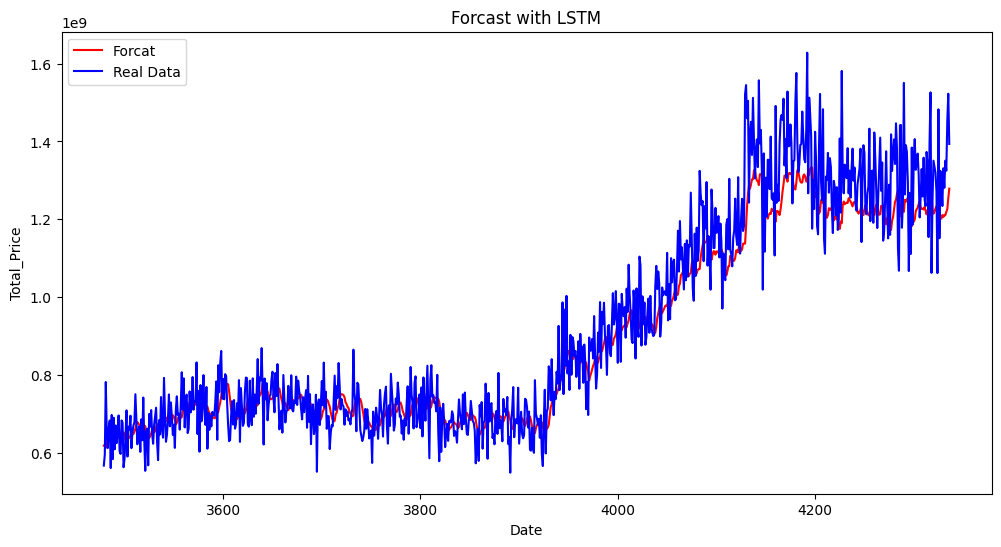

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + look_back:], test_predict, label='Forcat', color='red')
plt.plot(data.index[train_size + look_back:], scaler.inverse_transform(test_y), label='Real Data', color='blue')
plt.title('Forcast with LSTM')
plt.xlabel('Date')
plt.ylabel('Total_Price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import r2_score

# Assuming you have the actual values and predicted values
actual_values = scaler.inverse_transform(test_y)
predicted_values = test_predict

# Calculate R2 score
r2 = r2_score(actual_values, predicted_values)
print("R-squared (R2) score:", r2)

R-squared (R2) score: 0.8952671442910461


1/1 [==============================] - 0s 31ms/step


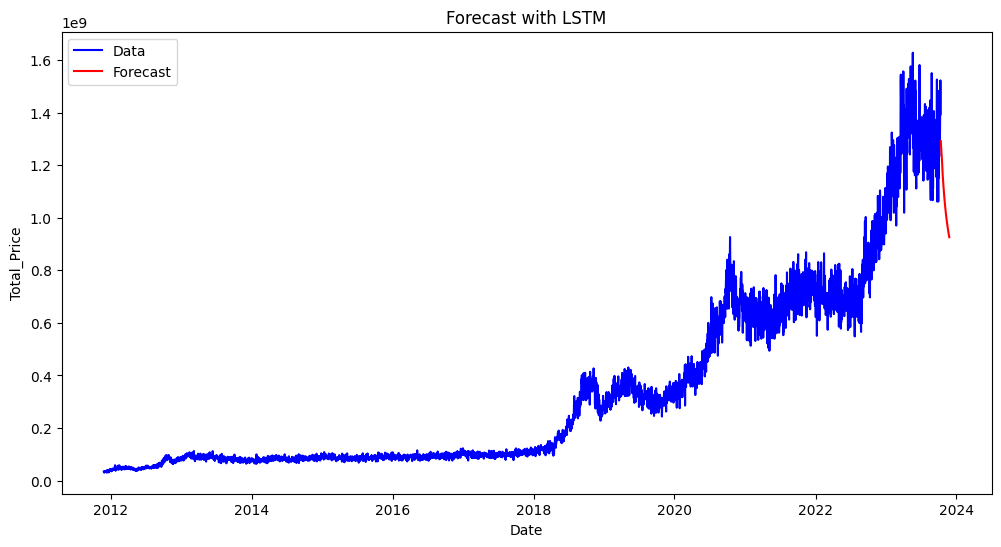

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


# Predict the next 45 days
future_forecast = []
last_sequence = test_data[-look_back:]  # Use the last available data

for _ in range(45):
    prediction = model.predict(last_sequence.reshape(1, look_back, 1))
    future_forecast.append(prediction[0, 0])  # Extract the predicted value
    last_sequence = np.append(last_sequence[1:], prediction)  # Update the last sequence

# Inverse transform the forecast data
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Create a new date range for the forecast period
forecast_dates = pd.date_range(start='2023-10-12', periods=45, freq='D')

# Plot the data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Data', color='blue')
plt.plot(forecast_dates, future_forecast, label='Forecast', color='red')
plt.title('Forecast with LSTM')
plt.xlabel('Date')
plt.ylabel('Total_Price')
plt.legend()
plt.show()


In [35]:
forecast_dates = np.array(forecast_dates).flatten()
future_forecast = np.array(future_forecast).flatten()
data = {'Date': forecast_dates, 'Forecast': future_forecast}
forecast_df = pd.DataFrame(data)
forecast_df.to_csv('forecast_df_45.CSV')
